In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Handle Missing Data

In [4]:
#Check for missing data
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
#Make a copy of data
penguins_1 = penguins

In [6]:
#Fill missing data with mean_value
for column in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']:
    penguins_1.fillna({column:penguins_1[column].mean()}, inplace=True)
#Fill the sex missing value with the most frequent value
penguins_1.fillna({'sex':penguins_1['sex'].mode()[0]}, inplace=True)
    

In [7]:
penguins_1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [8]:
#Check missing data again
penguins_1.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Handle Missing Data With Scikit-Learn


In [9]:
#Check for missing data
penguins = sns.load_dataset('penguins')
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
#Select the numeric and categorial columns
numeric_cols, categorical_cols = penguins.select_dtypes(include=['float64', 'int64']).columns,penguins.select_dtypes(include=['object']).columns

In [12]:
#Use the SimpleImputer from Scikit-Learn to handle its
from sklearn.impute import SimpleImputer

#Create Imputer
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
#Impute Missing Data
penguins[numeric_cols] = numeric_imputer.fit_transform(penguins[numeric_cols])
penguins[categorical_cols] = categorical_imputer.fit_transform(penguins[categorical_cols])

In [13]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [14]:
#Check missing data again
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# So sánh giữa `SimpleImputer` và `Manual Filling Way` để `Handle Mising Data`
<table>
  <thead>
    <tr>
      <th></th>
      <th style="background-color: #d0f0c0; color: #005500;"><strong>Sử dụng SimpleImputer</strong></th>
      <th style="background-color: #f8d7da; color: #721c24;"><strong>Manual filling way</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="background-color: #f0f8ff;"><strong>Dễ sử dụng</strong></td>
      <td>Dễ áp dụng, đặc biệt là cho nhiều cột</td>
      <td>Cần nhiều dòng mã hơn và xử lý từng cột riêng lẻ</td>
    </tr>
    <tr>
      <td style="background-color: #f0f8ff;"><strong>Tính linh hoạt</strong></td>
      <td>Hạn chế ở các chiến lược được định nghĩa trước</td>
      <td>Có thể tùy chỉnh cao dựa trên nhu cầu dữ liệu</td>
    </tr>
    <tr>
      <td style="background-color: #f0f8ff;"><strong>Tốc độ</strong></td>
      <td>Thường nhanh hơn cho nhiều cột</td>
      <td>Chậm hơn, vì mỗi cột cần được xử lý riêng biệt</td>
    </tr>
    <tr>
      <td style="background-color: #f0f8ff;"><strong>Kiểm soát</strong></td>
      <td>Ít kiểm soát hơn về các giá trị cụ thể được sử dụng</td>
      <td>Toàn quyền kiểm soát các giá trị được dùng để điền</td>
    </tr>
    <tr>
      <td style="background-color: #f0f8ff;"><strong>Xử lý lỗi</strong></td>
      <td>Xử lý các loại dữ liệu và NaN một cách linh hoạt</td>
      <td>Có thể cần thêm kiểm tra để xử lý các loại dữ liệu khác nhau</td>
    </tr>
  </tbody>
</table>


## Visualize data on a chart

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

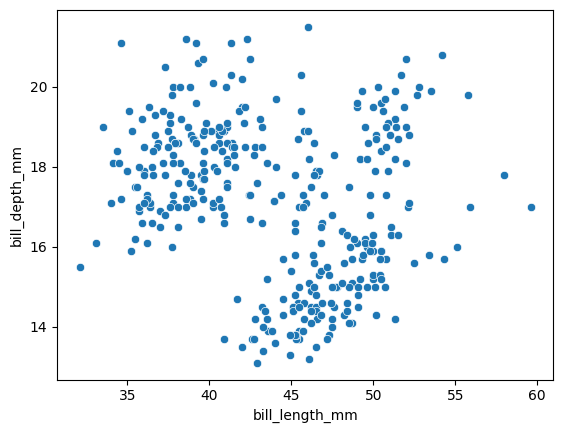

In [24]:
#Visualize Data
sns.scatterplot(data = penguins,x = 'bill_length_mm', y= 'bill_depth_mm')

In [25]:
#Check Species of penguin
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

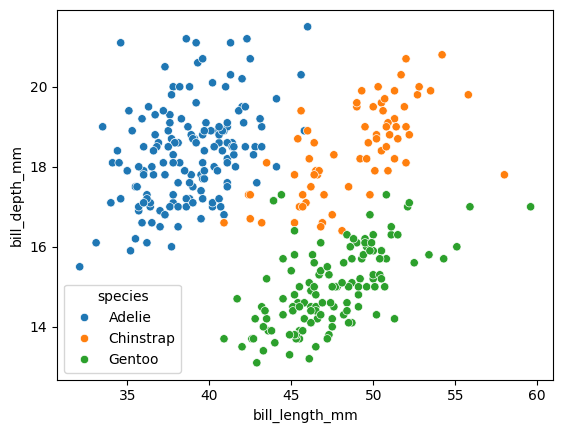

In [26]:
sns.scatterplot(data = penguins,x = 'bill_length_mm', y= 'bill_depth_mm',hue = 'species')


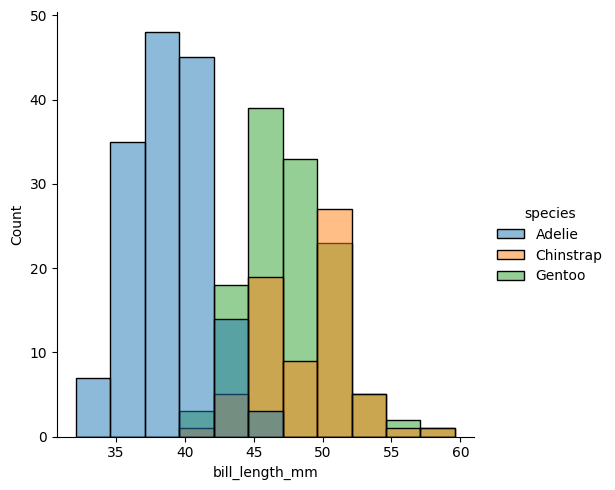

In [39]:
sns.displot(data = penguins,x='bill_length_mm',hue = 'species')


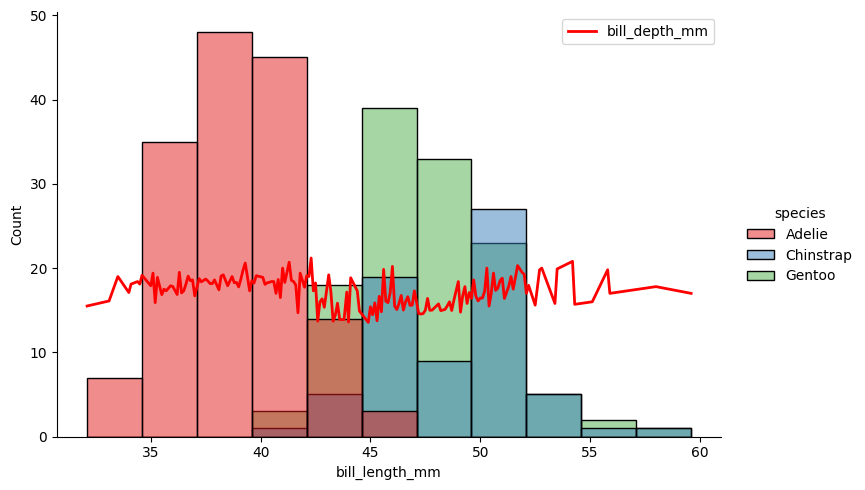

In [42]:
sns.displot(penguins, x="bill_length_mm", hue="species", kde=False, palette="Set1", height=5, aspect=1.5)
avg_bill_depth = penguins.groupby('bill_length_mm')['bill_depth_mm'].mean()
plt.plot(avg_bill_depth.index, avg_bill_depth.values, color='red', label="bill_depth_mm", linewidth=2)
plt.legend()
plt.show()

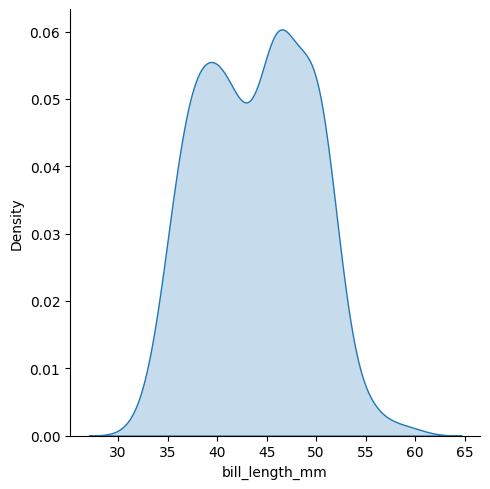

In [44]:
sns.displot(data=penguins, x='bill_length_mm', kind='kde', fill=True)

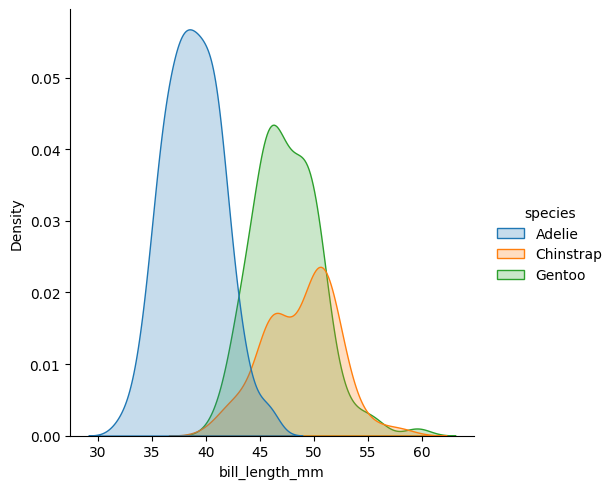

In [45]:
sns.displot(data=penguins, x='bill_length_mm',hue = 'species' ,kind='kde', fill=True)

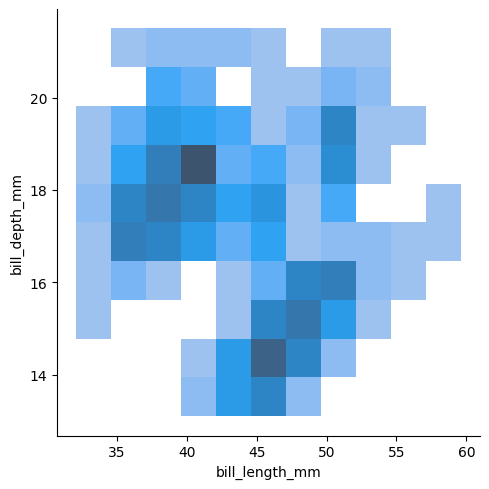

In [46]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm')

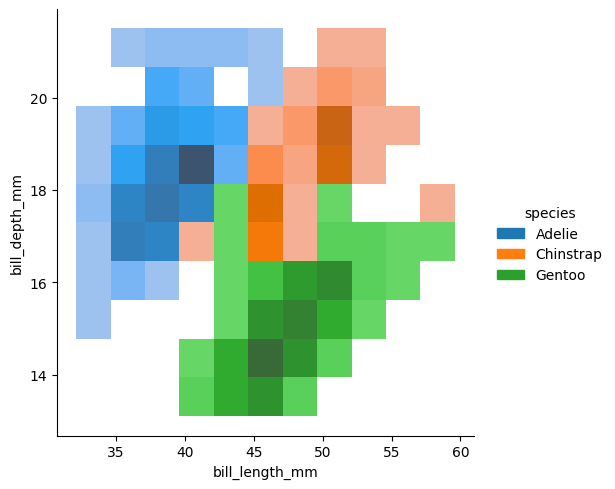

In [47]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm',hue = 'species')

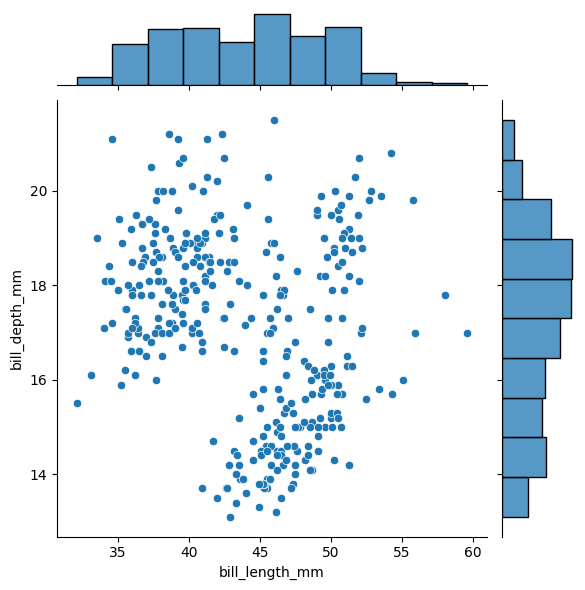

In [49]:
sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm')

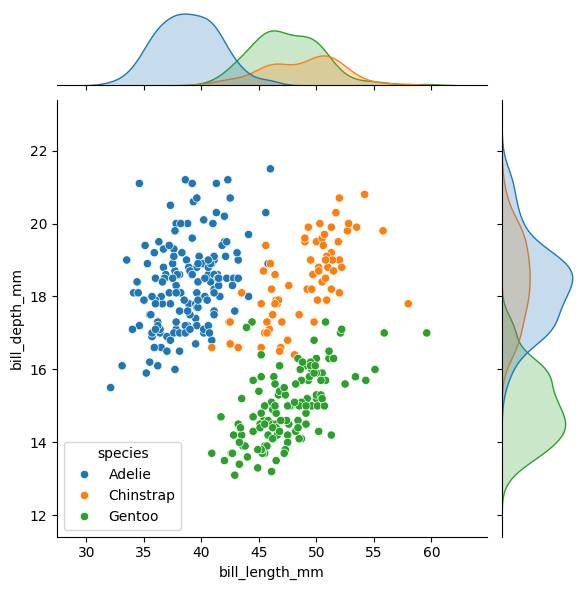

In [50]:
sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm',hue = 'species')

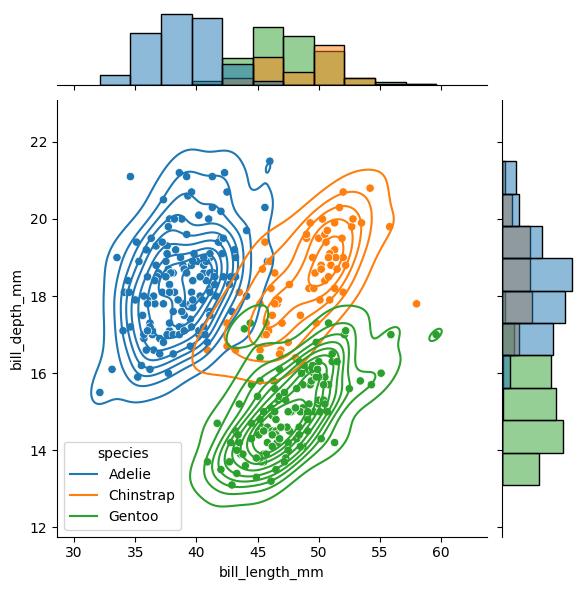

In [54]:
g= sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm',hue = 'species')
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

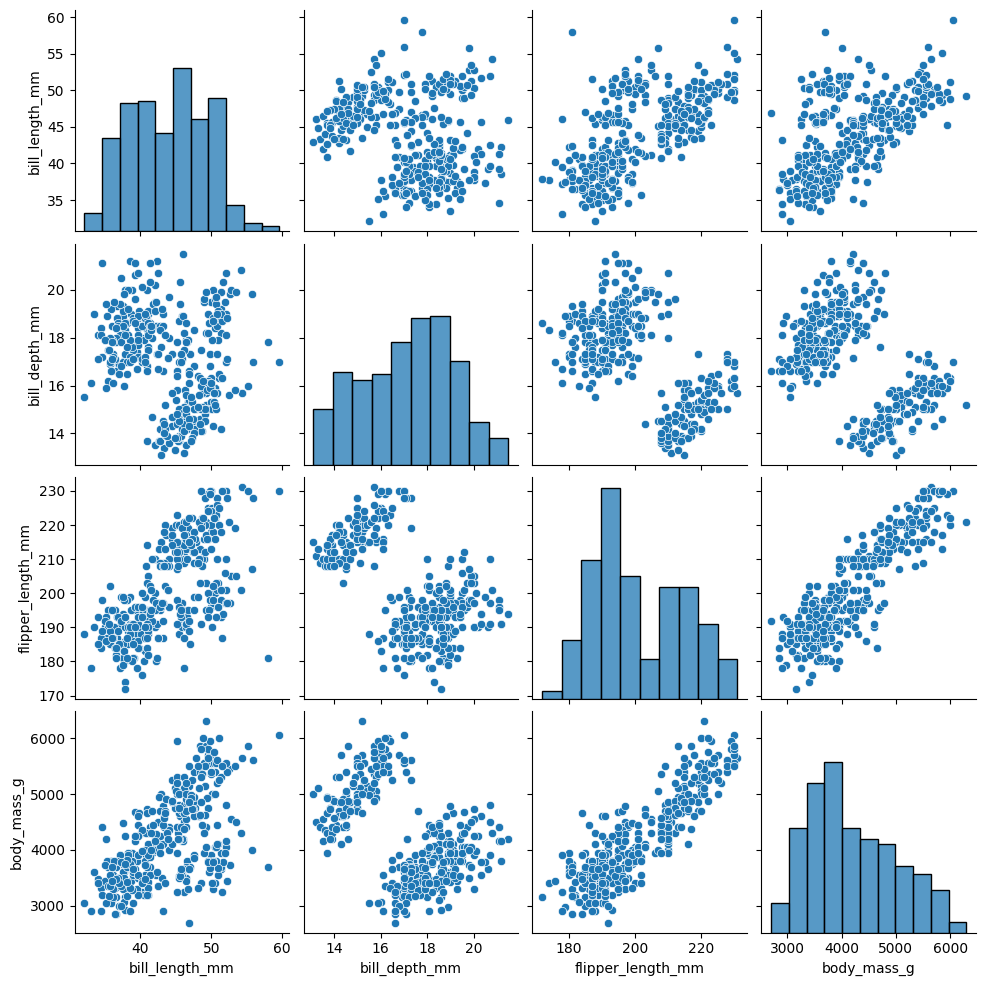

In [55]:
sns.pairplot(data = penguins)

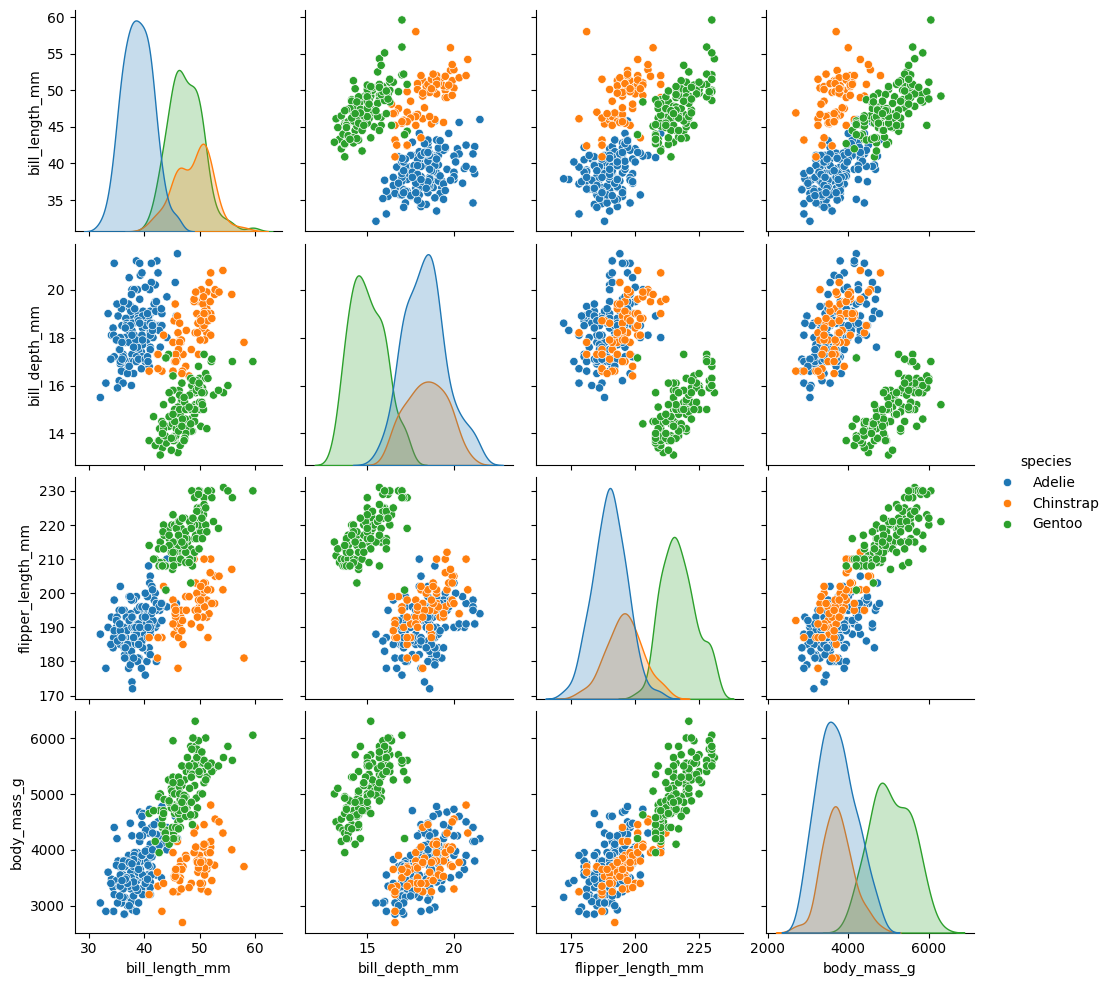

In [56]:
sns.pairplot(data = penguins,hue = 'species')

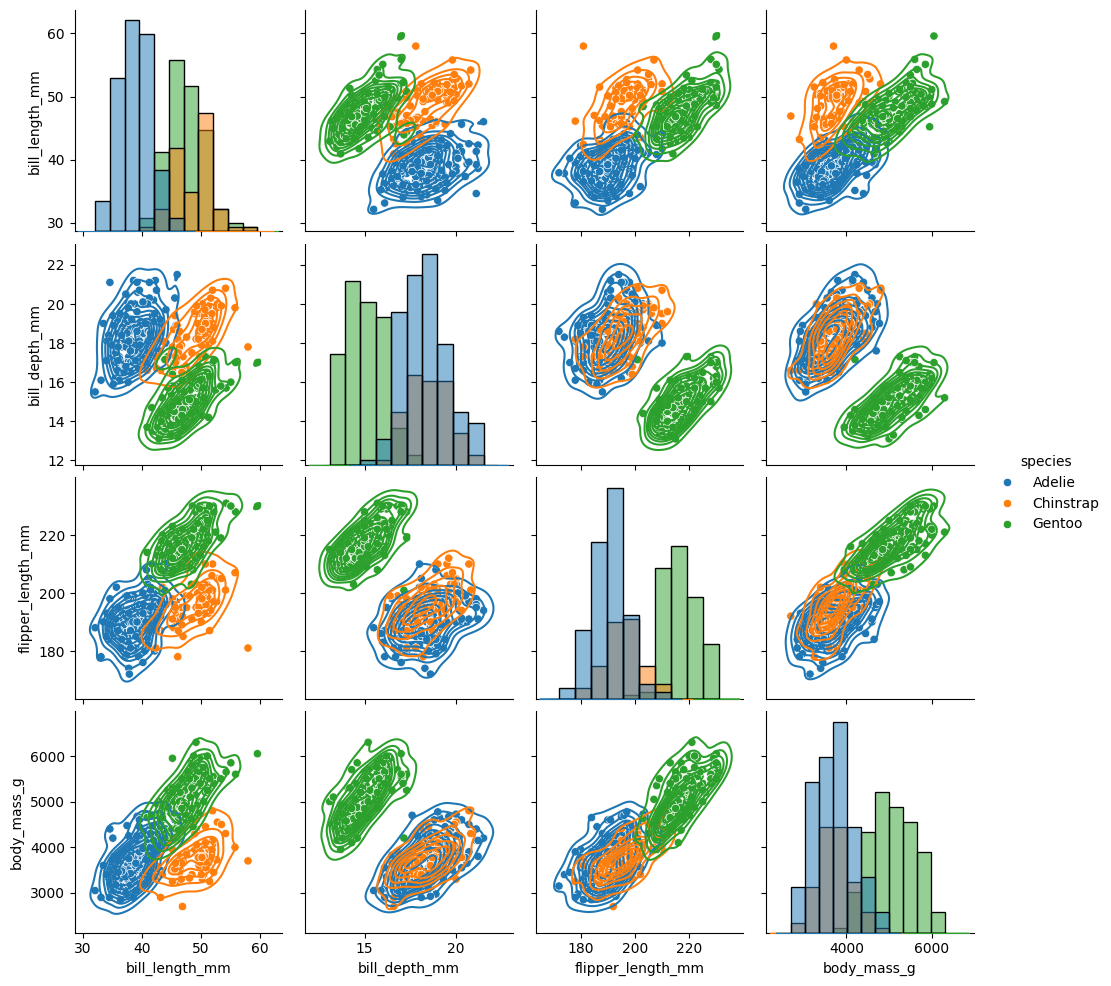

In [57]:
sns.pairplot(data = penguins,hue = 'species').map_diag(sns.histplot).map_lower(sns.kdeplot).map_upper(sns.kdeplot)

## Some others Plots

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

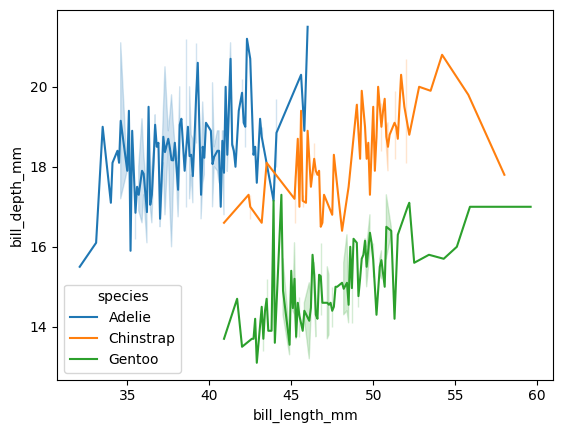

In [59]:
sns.lineplot(data= penguins,x= 'bill_length_mm',y='bill_depth_mm',hue= 'species')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

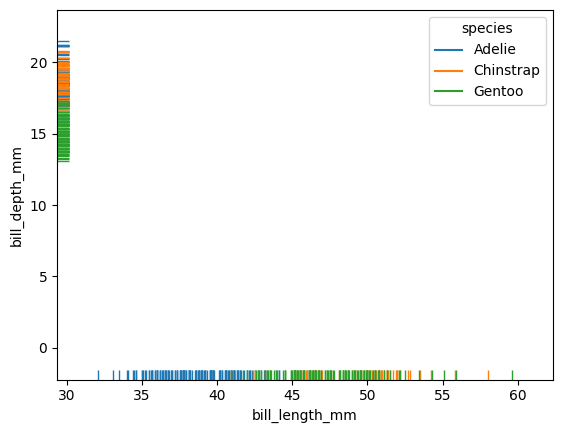

In [64]:
sns.rugplot(data = penguins,x='bill_length_mm',y='bill_depth_mm',hue = 'species')

<Axes: xlabel='species', ylabel='bill_length_mm'>

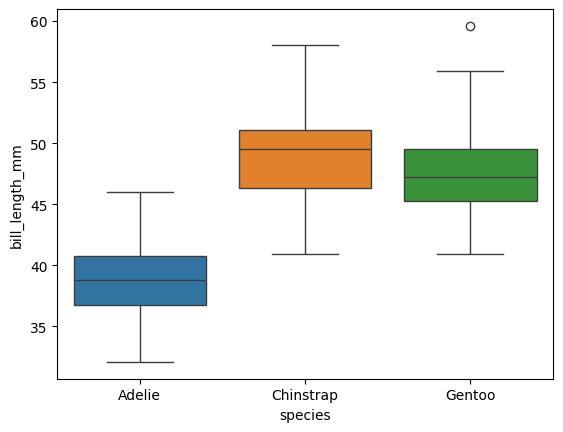

In [70]:
sns.boxplot(data=penguins, x='species', y='bill_length_mm',hue = 'species')

<Axes: xlabel='species', ylabel='bill_length_mm'>

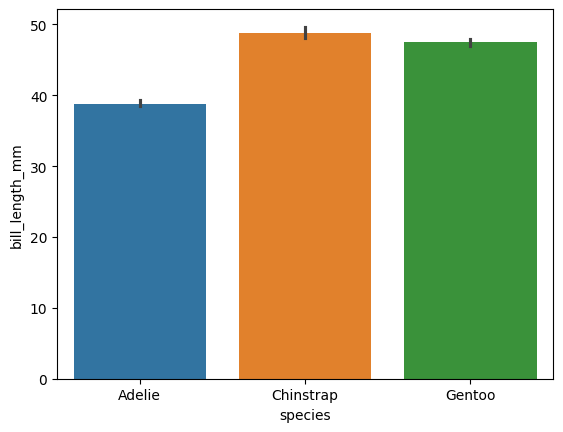

In [71]:
sns.barplot(data=penguins, x='species', y='bill_length_mm',hue = 'species')

<Axes: xlabel='species', ylabel='bill_length_mm'>

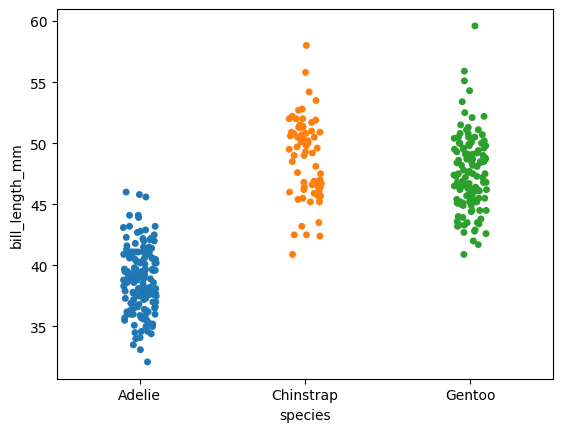

In [73]:
sns.stripplot(data=penguins, x='species', y='bill_length_mm', hue = 'species', jitter=True)

<Axes: xlabel='species', ylabel='bill_depth_mm'>

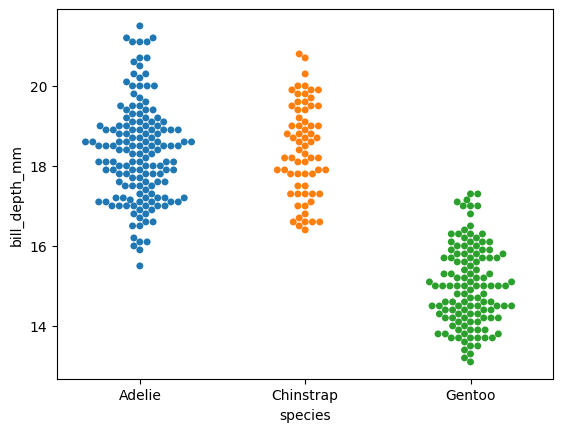

In [74]:
sns.swarmplot(data=penguins, x='species', y='bill_depth_mm',  hue = 'species')

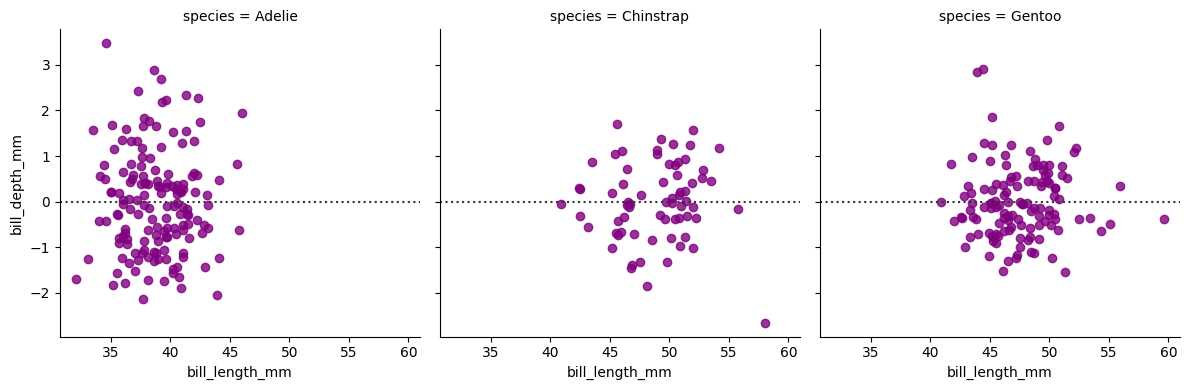

In [88]:
colors = {'Adelie': 'skyblue', 'Chinstrap': 'lightgreen', 'Gentoo': 'salmon'}
g = sns.FacetGrid(penguins, col='species', col_wrap=3, height=4)
g.map(sns.residplot, 'bill_length_mm', 'bill_depth_mm', color='purple')

## Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#Encoding the category var
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]  #features
y = penguins['species'] #target
#Convert to matrix
lb = LabelEncoder()
y_encoded = lb.fit_transform(y) 
#Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=23521049)
dtc = DecisionTreeClassifier(random_state=23521049, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=23521049)

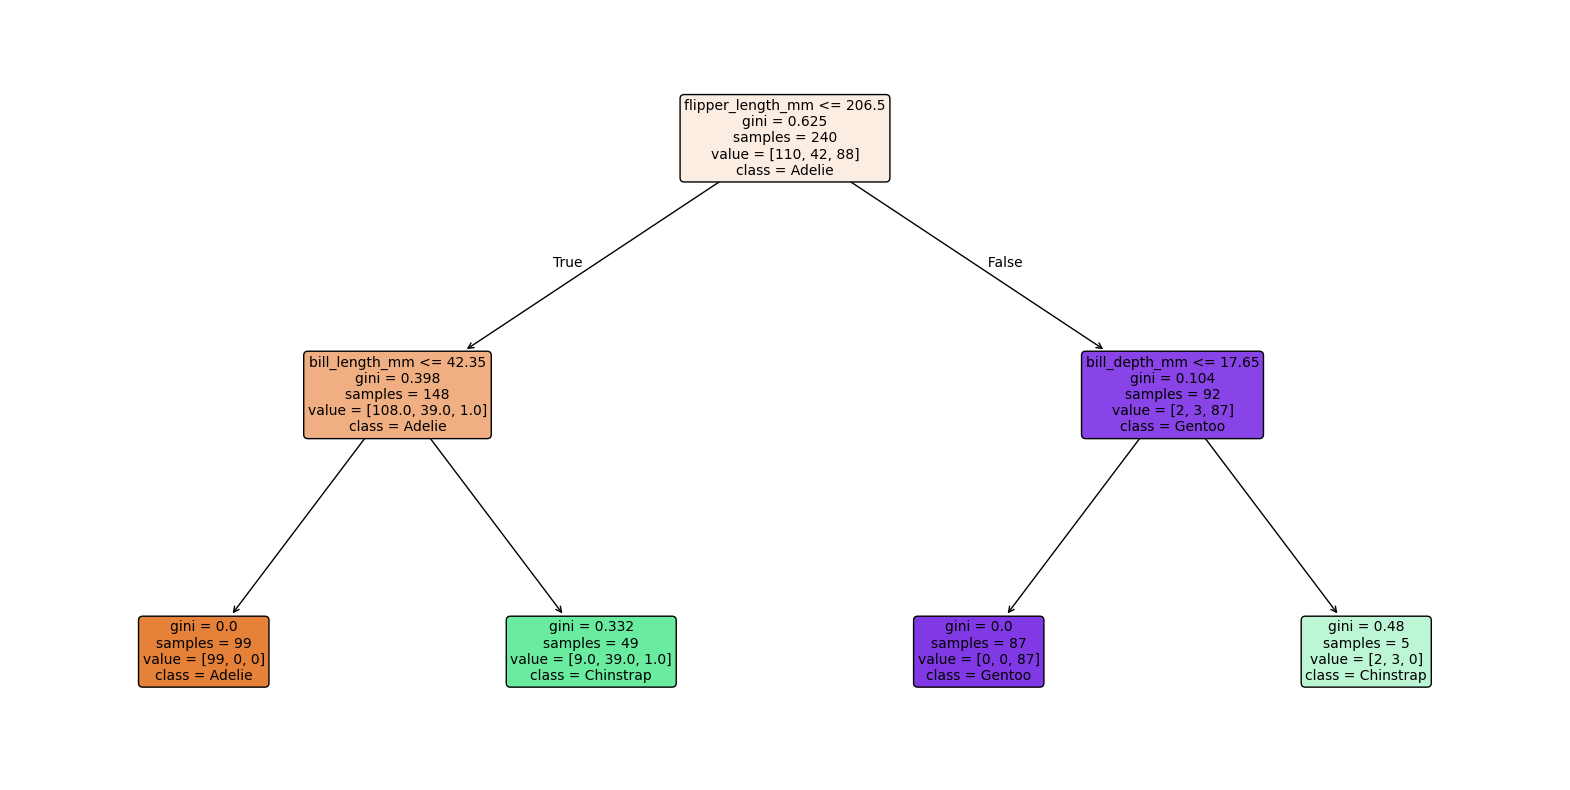

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=features, class_names=lb.classes_, filled=True,rounded=True, fontsize=10)
plt.show()

## Predict and Calculate Accurancy

In [133]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9519230769230769


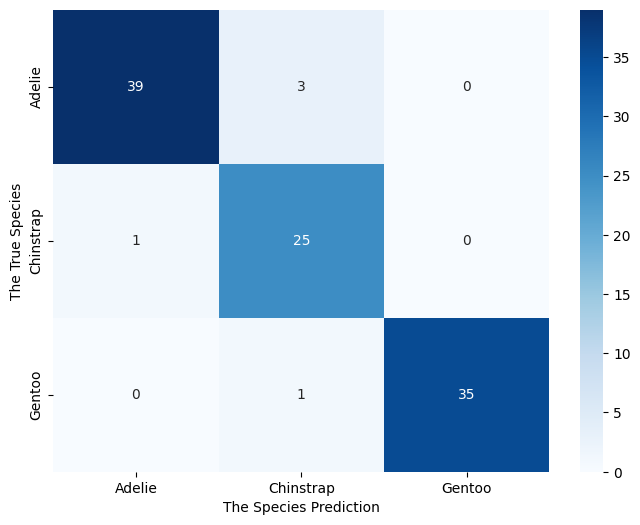

In [139]:
#Use heatmap to visualize the confusion matrix. The matrix shows how many times each species was correctly or incorrectly classified.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.ylabel('The True Species')
plt.xlabel('The Species Prediction')
plt.show()

## Try with the different max_depth parameters

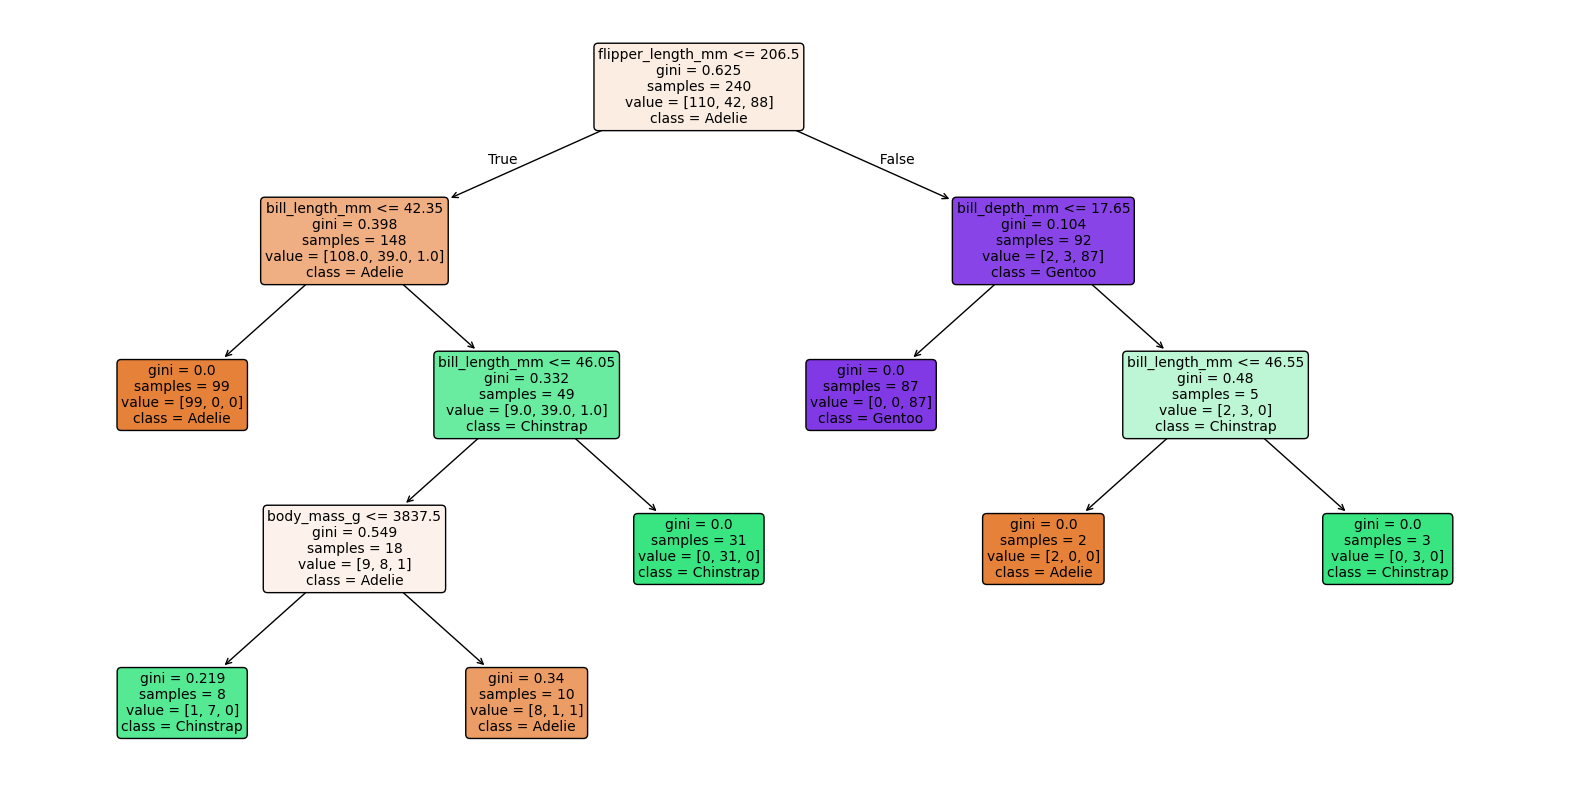

In [140]:
dtc = DecisionTreeClassifier(random_state=23521049, max_depth=4)
dtc.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=features, class_names=lb.classes_, filled=True,rounded=True, fontsize=10)
plt.show()

In [141]:
#Calculate accurancy
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9711538461538461


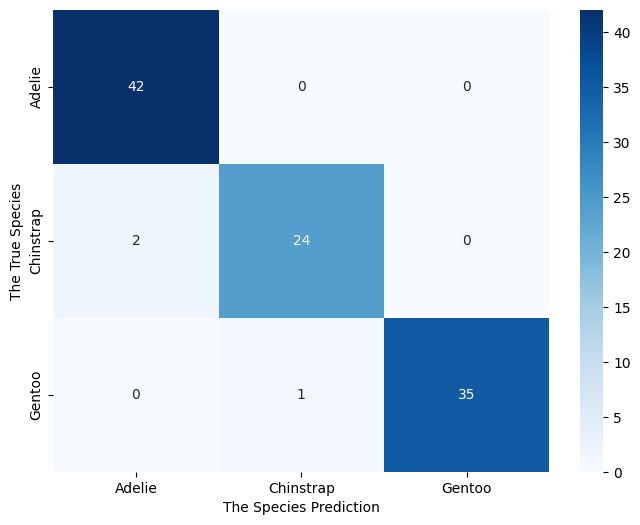

In [142]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.ylabel('The True Species')
plt.xlabel('The Species Prediction')
plt.show()

## Increase max_depth parameters


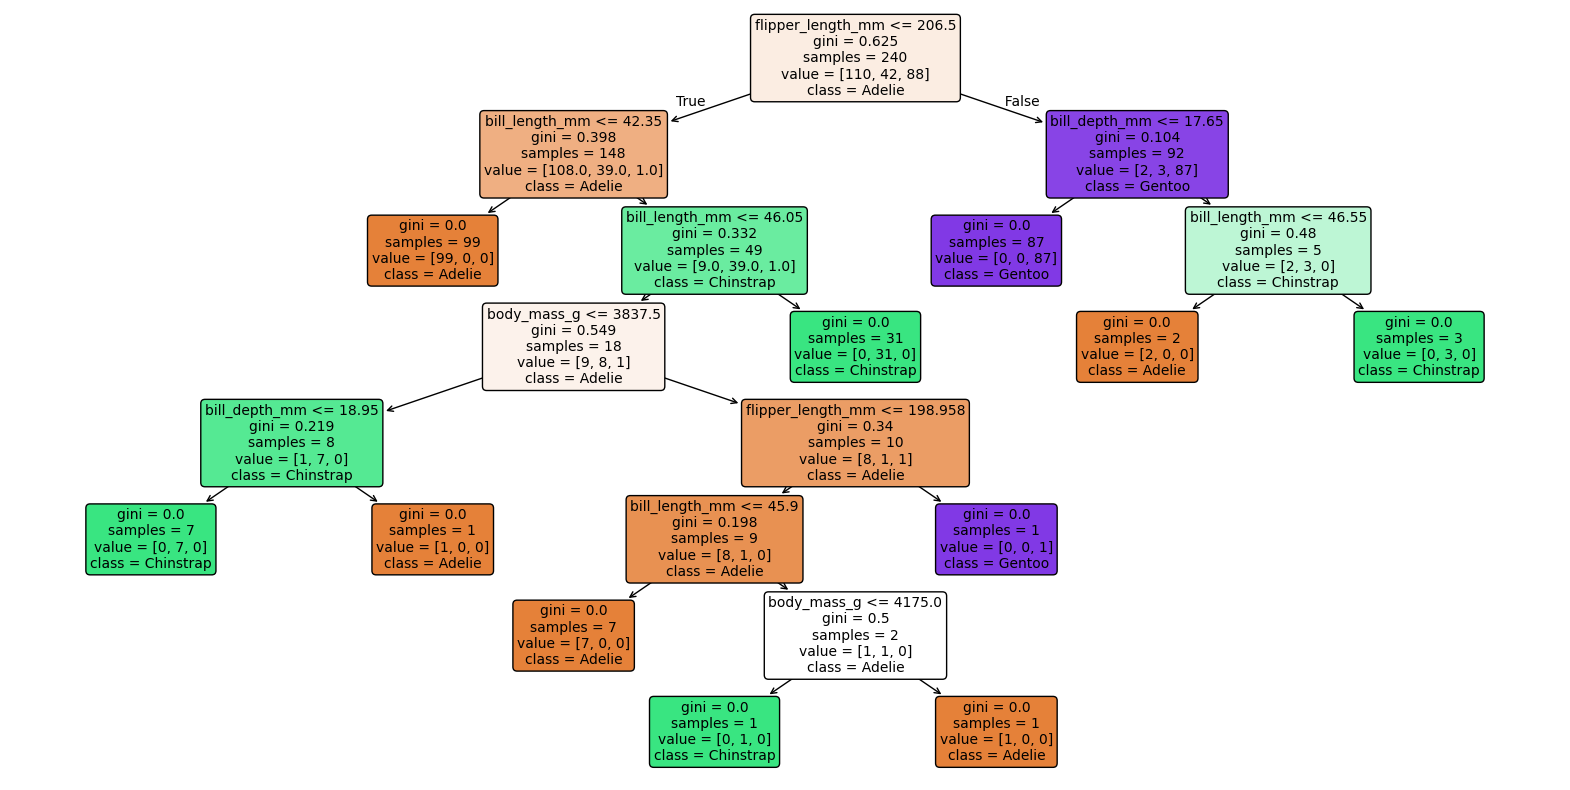

In [152]:
dtc = DecisionTreeClassifier(random_state=23521049, max_depth=10)
dtc.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=features, class_names=lb.classes_, filled=True,rounded=True, fontsize=10)
plt.show()

In [153]:
#Calculate accurancy
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9519230769230769


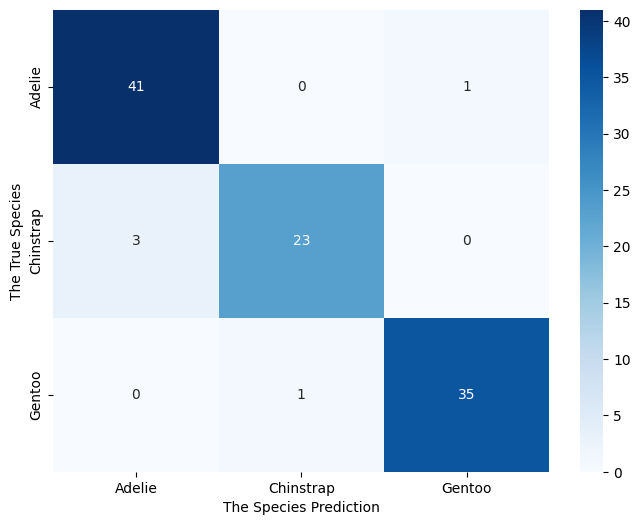

In [154]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.ylabel('The True Species')
plt.xlabel('The Species Prediction')
plt.show()

## Compare the max_depth trong 3 ví dụ trên

| **Max_depth Parameter Value**                  | **Accurancy Score**|                               
|------------------------------------------------|------------------- |
| **2**                                          | 0,95192            | 
| **4**                                          | 0,97115            |              
| **10**                                         | 0,95192            |


# Nhận Xét về `max_depth`

- **`max_depth`** kiểm soát chiều cao phân nhánh của cây quyết định:
  - Càng lớn, cây quyết định sẽ có nhiều lớp phân nhánh hơn.

## Ảnh hưởng của `max_depth`:

<div style="background-color: #d9f7be; padding: 10px; border-left: 5px solid #87d068; margin-bottom: 10px;">
  Tăng <strong>max_depth</strong> có thể:
  <ul>
    <li><strong>Tăng accuracy score</strong> trên dữ liệu huấn luyện.</li>
    <li>Nếu quá lớn, có thể xuất hiện hiện tượng <strong>overfitting</strong>:
      <ul>
        <li><strong>Overfitting</strong> xảy ra khi mô hình học quá chi tiết các đặc điểm của dữ liệu huấn luyện, bao gồm cả nhiễu và lỗi.</li>
        <li>Kết quả là, <strong>accuracy score</strong> trên dữ liệu kiểm tra có thể giảm.</li>
      </ul>
    </li>
  </ul>
</div>

<div style="background-color: #fff2e6; padding: 10px; border-left: 5px solid #ff6f61;">
  Giảm <strong>max_depth</strong> có thể:
  <ul>
    <li>Có thể khiến cây quá <strong>đơn giản</strong>, dẫn đến hiện tượng <strong>underfitting</strong>:
      <ul>
        <li><strong>Underfitting</strong> xảy ra khi mô hình không học đủ các đặc điểm quan trọng của dữ liệu.</li>
        <li>Kết quả là, <strong>accuracy score</strong> trên cả dữ liệu huấn luyện và kiểm tra có thể thấp.</li>
      </ul>
    </li>
  </ul>
</div>